# LeNet5 Model | CIFAKE


In [1]:
from keras.layers import Dense, AveragePooling2D, Convolution2D, InputLayer, Flatten
from utils import (
    build_sequential_model,
    load_augmented_data,
    plot_performance_curves,
    save_model_history,
    load_model_history,
)
import PIL

PIL.Image.MAX_IMAGE_PIXELS = None

In [6]:
model_name = "lenet5_model_cifake"
dataset_base_path = "./datasets/CIFAKE"

# Forcefully train the model
force_model_train = False

# Don't save the model
no_save = False

In [7]:
# Load saved model and its history
model_history_loaded, classifier, history = load_model_history(model_name)

In [8]:
# Building model
if not model_history_loaded or force_model_train:
    classifier = build_sequential_model(
        layers=[
            InputLayer((32, 32, 3)),

            Convolution2D(12, (5, 5), activation="tanh"),
            AveragePooling2D((2, 2)),

            Convolution2D(32, (5, 5), activation="tanh"),
            AveragePooling2D((2, 2)),

            Convolution2D(240, (5, 5), activation="tanh"),

            Flatten(),

            Dense(1024, activation="tanh"),
            Dense(2, activation="softmax"),
        ]
    )

In [9]:
# Model summary
classifier.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 28, 28, 12)        912       
                                                                 
 average_pooling2d_20 (Avera  (None, 14, 14, 12)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_23 (Conv2D)          (None, 10, 10, 32)        9632      
                                                                 
 average_pooling2d_21 (Avera  (None, 5, 5, 32)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_24 (Conv2D)          (None, 1, 1, 240)         192240    
                                                                 
 flatten_3 (Flatten)         (None, 240)              

In [91]:
# Load augmented image generators
train_generator, validation_generator = load_augmented_data(dataset_base_path)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [92]:
# Train model
if not model_history_loaded or force_model_train:
    history = classifier.fit(
        train_generator,
        epochs=100,
        validation_data=validation_generator,
    )
    history = history.history

Epoch 1/100
10000/10000 [==============================] - 74s 7ms/step - loss: 0.6738 - accuracy: 0.5853 - val_loss: 0.5807 - val_accuracy: 0.6696
Epoch 2/100
10000/10000 [==============================] - 75s 7ms/step - loss: 0.6012 - accuracy: 0.6715 - val_loss: 0.5335 - val_accuracy: 0.7194
Epoch 3/100
10000/10000 [==============================] - 75s 8ms/step - loss: 0.5671 - accuracy: 0.7034 - val_loss: 0.4977 - val_accuracy: 0.7555
Epoch 4/100
10000/10000 [==============================] - 75s 7ms/step - loss: 0.5371 - accuracy: 0.7283 - val_loss: 0.5208 - val_accuracy: 0.7329
Epoch 5/100
10000/10000 [==============================] - 75s 8ms/step - loss: 0.5152 - accuracy: 0.7459 - val_loss: 0.4196 - val_accuracy: 0.8030
Epoch 6/100
10000/10000 [==============================] - 75s 7ms/step - loss: 0.5057 - accuracy: 0.7528 - val_loss: 0.4273 - val_accuracy: 0.8020
Epoch 7/100
10000/10000 [==============================] - 76s 8ms/step - loss: 0.4884 - accuracy: 0.7638 - val_

In [93]:
# Save model
if not model_history_loaded or (force_model_train and not no_save) or not no_save:
    save_model_history(classifier, history, model_name)

INFO:tensorflow:Assets written to: ./models/lenet5-100-epochs_model_cifake/model\assets


INFO:tensorflow:Assets written to: ./models/lenet5-100-epochs_model_cifake/model\assets


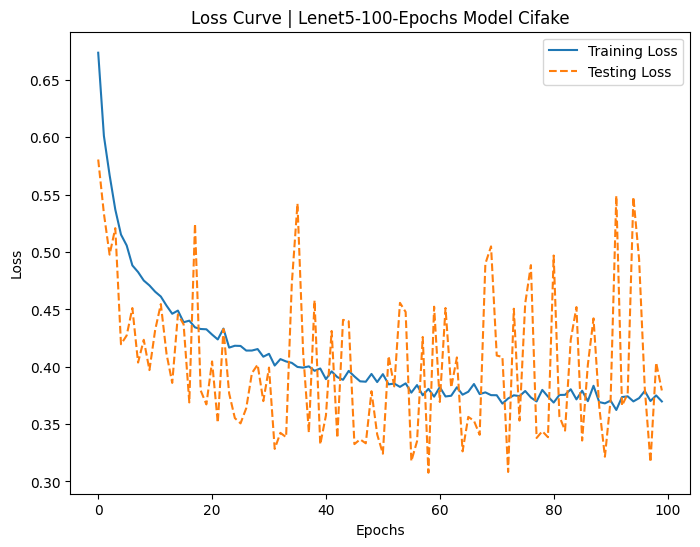

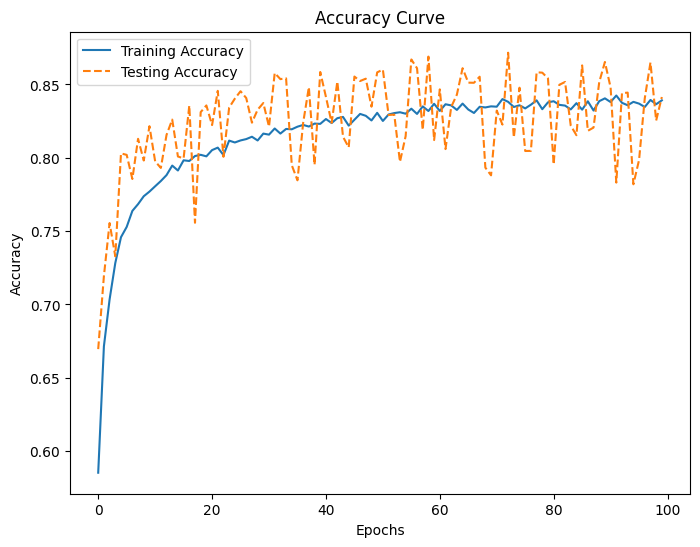

In [94]:
# Plot performance curves
plot_performance_curves(history, model_name)